 # CODTECH IT SOLUTIONS [Author - T.Nagaraju, Data science Intern]

## TASK-3 Sales Prediction Using Python

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account 
various factors such as advertising expenditure, target audience segmentation, and
advertising platform selection.

Dataset Sample : https://www.kaggle.com/code/nandhanasuresh/sales-prediction-using-python/input

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the data
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Basic Observation

Avg expence is highest on TV


Avg expence spend is Lowest on Radio


MAx sale is 27 and min is 1.6

In [4]:
#first five rows of the data
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
#rows and columns
df.shape

(200, 5)

In [6]:
#stastical measures about the data
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
#information about the datadf.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#missing values in each column
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

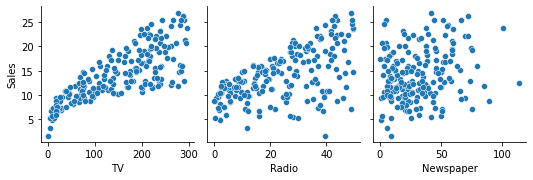

In [9]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind='scatter')
plt.show()

pair plot observation

when advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.

<AxesSubplot:ylabel='Frequency'>

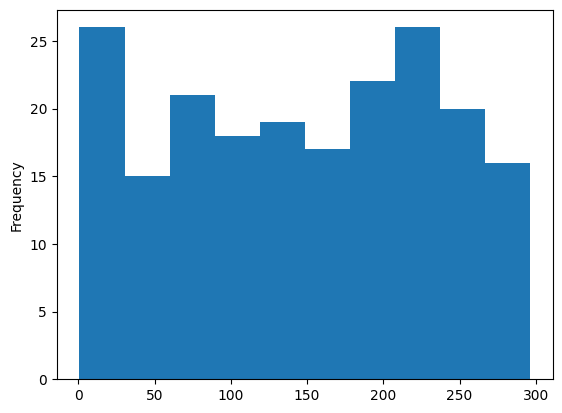

In [10]:
df['TV'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

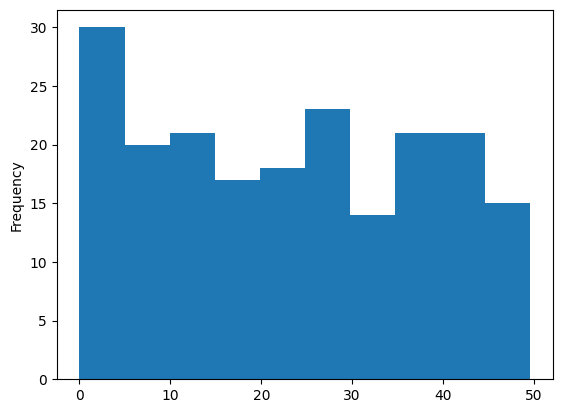

In [11]:
df['Radio'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

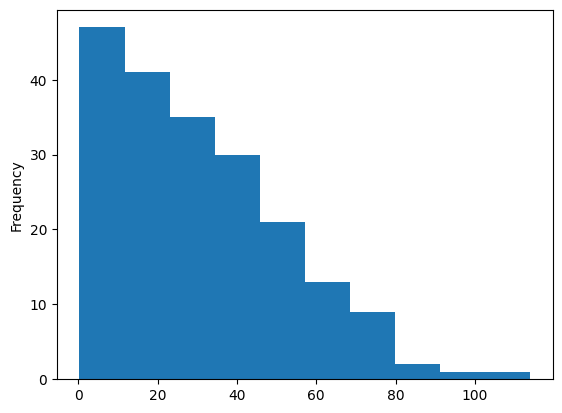

In [12]:
df['Newspaper'].plot.hist(bins=10)

Histogram observation : The mejority sales is the result of low advertising cost in newspaper

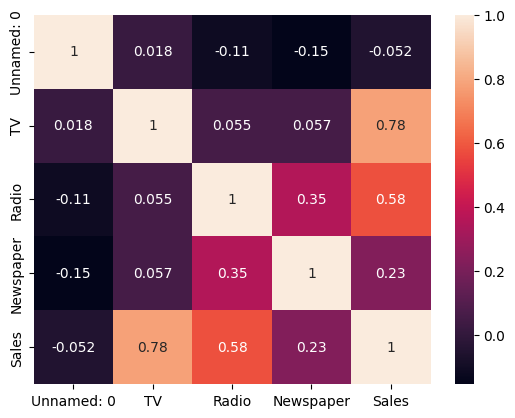

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### SALES IS HIGHLY COORELATED WITH THE TV 

Lets train our model using linear regression as it is coorelated with only one variable TV

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df[['TV']],df[['Sales']],test_size=0.3,random_state=0)

In [15]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [16]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [17]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [18]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
res = model.predict(x_test)
print(res)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [21]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [22]:
model.coef_

array([[0.04581434]])

In [23]:
model.intercept_

array([7.31081017])

In [24]:
0.04581434*69.2+7.31081017

10.481162498

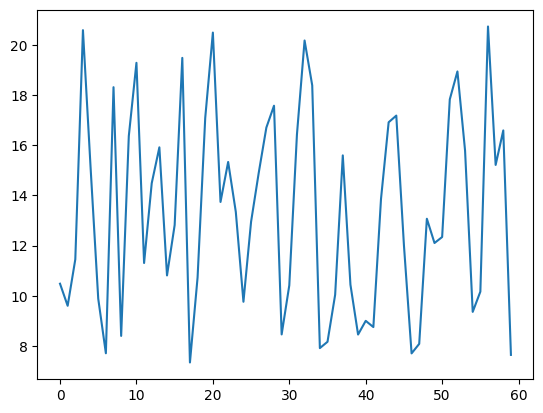

In [25]:
plt.plot(res)

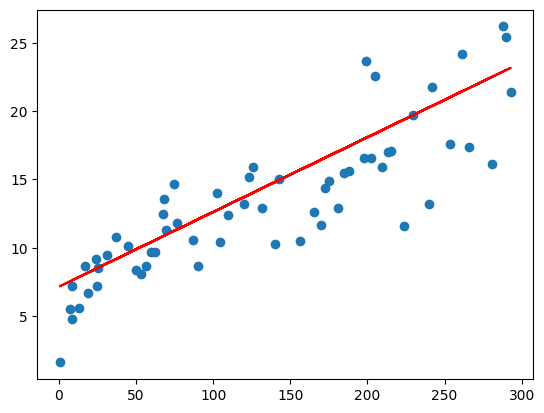

In [26]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.14382225 + 0.05473199*x_test,'r')
plt.show()

### Concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets. 